### Odds, Odds Ratio, Log Odds, and Logistic Regression in Machine Learning

#### Odds:
**Odds** represent the likelihood of an event occurring relative to it not occurring. In the context of binary classification, they provide a way to model the relative risk of an outcome happening.

**Odds** = $\frac{P(A)}{P(\neg A)}$

Where:
- $P(A)$ = Probability of event $A$ (e.g., class "1") occurring
- $P(\neg A)$ = Probability of event $A$ not occurring (e.g., class "0"), or $1 - P(A)$

#### Odds Ratio:
**The odds ratio (OR)** compares the odds of event $A$ happening to the odds of event $B$ happening, which is crucial for comparing relative risk across different conditions or groups.

**Odds Ratio (OR)** = $\frac{ \frac{P(A)}{P(\neg A)} }{ \frac{P(B)}{P(\neg B)} }$

#### Log Odds:
**Log odds** transform the odds into a logarithmic scale, making it easier to model using linear techniques, especially in logistic regression. This transformation allows the relationship between predictors and the target to be modeled in a linear fashion.

**Log Odds** = $\log \left( \frac{P(A)}{1 - P(A)} \right)$

Where:
- $P(A)$ = Probability of event $A$ (class "1") occurring
- $1 - P(A)$ = Probability of event $A$ not occurring (class "0")

### Logistic Regression: The ML Model
Logistic Regression is a foundational algorithm for binary classification, modeling the **log odds** of the outcome as a linear combination of input features. By using the log odds, we can predict the probability of a class label (e.g., "1" or "0").

#### Logistic Regression Model:
$$
\log \left( \frac{P(A)}{1 - P(A)} \right) = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \dots + \beta_n X_n
$$

Where:
- $P(A)$ = Probability of event $A$ (e.g., the probability of a positive class "1")
- $X_1, X_2, \dots, X_n$ = Predictor variables (features)
- $\beta_0$ = Intercept (the log odds when all features are zero)
- $\beta_1, \beta_2, \dots, \beta_n$ = Coefficients of the predictor variables (learned from the data)

#### Odds and Coefficients in Logistic Regression:
In **logistic regression**, the coefficients ($\beta$ values) represent the change in the **log odds** for a one-unit increase in the corresponding predictor variable. The **model** learns the coefficients during training to best fit the relationship between features and the target label.

#### Exponentiated Coefficients: Odds Ratios
The **odds ratio (OR)** for a predictor variable $X_i$ is the exponentiation of its coefficient $\beta_i$. The odds ratio helps us interpret how the odds change in relation to the target event when the predictor variable increases by one unit.

**Odds Ratio (OR)** = $e^{\beta_i}$

Where:
- $OR_i$ = Odds ratio for predictor $X_i$
- $e^{\beta_i}$ = Exponentiated coefficient

#### Interpretation of Coefficients and Odds Ratios:
- **Odds Ratio (OR)**: The odds ratio tells you how the odds of the event change for a one-unit increase in a feature.
  - If $OR > 1$: A one-unit increase in $X_i$ **increases** the odds of event $A$ (i.e., class "1").
  - If $OR < 1$: A one-unit increase in $X_i$ **decreases** the odds of event $A$ (i.e., class "1").
  - If $OR = 1$: The predictor $X_i$ has **no effect** on the odds of event $A$.

#### Example:
Suppose $\beta_1 = 0.5$ for a predictor variable $X_1$:
- For each one-unit increase in $X_1$, the **log odds** of event $A$ (e.g., class "1") increase by 0.5.
- The corresponding **odds ratio** is $OR_1 = e^{0.5} \approx 1.65$. This means that for each one-unit increase in $X_1$, the odds of event $A$ happening increase by a factor of approximately **1.65**.

Optimization terminated successfully.
         Current function value: 0.598780
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                Outcome   No. Observations:                  537
Model:                          Logit   Df Residuals:                      534
Method:                           MLE   Df Model:                            2
Date:                Fri, 27 Dec 2024   Pseudo R-squ.:                 0.07525
Time:                        17:49:38   Log-Likelihood:                -321.54
converged:                       True   LL-Null:                       -347.71
Covariance Type:            nonrobust   LLR p-value:                 4.332e-12
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.7508      0.329     -8.357      0.000      -3.396      -2.106
BMI            0.8826      0.

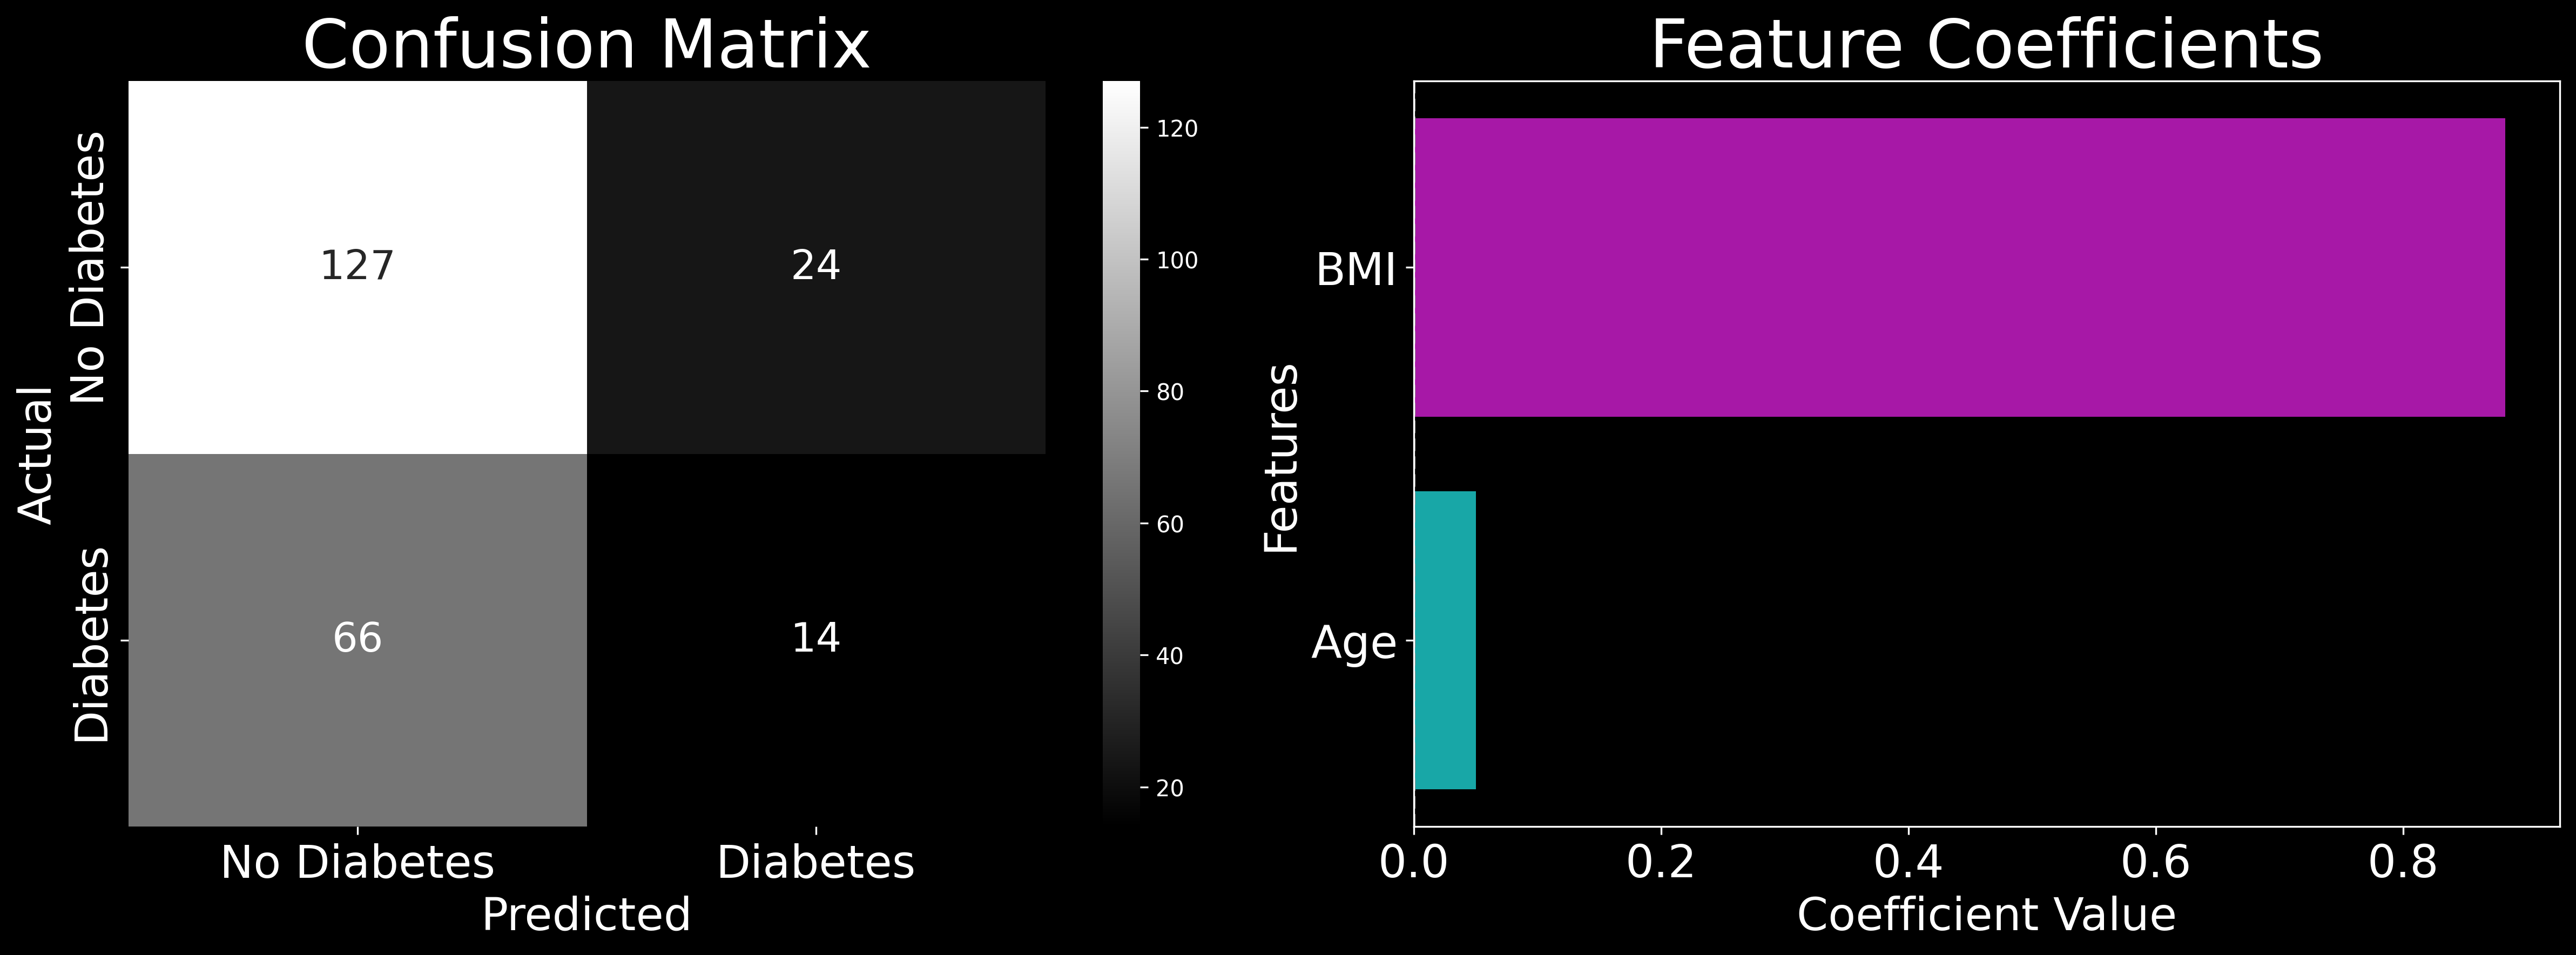

In [2]:
import warnings
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Suppress warnings
warnings.filterwarnings('ignore')
plt.style.use('dark_background')

# Load data
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv'
columns = ['BMI', 'Age', 'Outcome']
data = pd.read_csv(url, names=columns)

# Prepare data
X = data.drop('Outcome', axis=1)
y = data['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Add constant for the intercept in logistic regression
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

# Fit logistic regression model
log_reg_model = sm.Logit(y_train, X_train)
result = log_reg_model.fit()

# Print model summary
print(result.summary())

# Predictions
y_pred_prob = result.predict(X_test)
y_pred = (y_pred_prob >= 0.5).astype(int)

# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Display evaluation metrics
print(f'Accuracy: {accuracy:.4f}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

# Model equation
print("\nModel Equation:")
intercept = result.params[0]
coefficients = result.params[1:]
features = X.columns

model_eqn = f'log(odds) = {intercept:.4f}'
for feature, coef in zip(features, coefficients):
    model_eqn += f' + ({coef:.4f}) * {feature}'

print(model_eqn)

# Interpret coefficients
print("\nInterpretation of Coefficients:")
for feature, coef in zip(features, coefficients):
    odds_ratio = round(np.exp(coef), 3)
    print(f"- {feature}: Coefficient = {coef:.4f}, Odds Ratio = {odds_ratio:.3f}")
    if coef > 0:
        print(f"  Interpretation: For each one-unit increase in {feature}, the odds of having diabetes increase by {(odds_ratio - 1) * 100:.2f}%. \n")
    else:
        print(f"  Interpretation: For each one-unit increase in {feature}, the odds of having diabetes decrease by {(1 - odds_ratio) * 100:.2f}%. \n")

# Combined Plot: Confusion Matrix and Feature Coefficients
fig, axes = plt.subplots(1, 2, figsize=(16, 6), dpi=300)

# Confusion Matrix Plot
sns.heatmap(conf_matrix, annot=True, annot_kws={"fontsize": 18} ,fmt='d', cmap='gray', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'], ax=axes[0])
axes[0].set_title('Confusion Matrix', fontsize=30)
axes[0].set_xlabel('Predicted', fontsize=20)
axes[0].set_ylabel('Actual', fontsize=20)
axes[0].tick_params(axis='x', labelsize=20) 
axes[0].tick_params(axis='y', labelsize=20) 

# Feature Coefficient Plot
sns.barplot(x=coefficients, y=features, hue=features, palette=['m', 'c'], ax=axes[1])
axes[1].axvline(0, color='gray', linestyle='--')
axes[1].set_title('Feature Coefficients', fontsize=30)
axes[1].set_xlabel('Coefficient Value', fontsize=20)
axes[1].set_ylabel('Features', fontsize=20)

axes[1].tick_params(axis='x', labelsize=20)
axes[1].tick_params(axis='y', labelsize=20)
plt.tight_layout()
plt.show()